# Основы Numpy

## 1. Форма (размерность) массива (матрицы)

У каждого n-мерного массива есть форма. Например, форма матрицы (двумерного массива) из 3 строк и 5 колонок — это (3, 5), форма вектора (вертикального массива) из 10 элементов — это (10, 1). В общем случае форма n-мерного массива — это кортеж (последовательность чисел) из n элементов (n1,…,nk) где ni — количество компонент массива в i-м измерении.

In [1]:
import numpy as np

In [2]:
a = np.array([[1,2,3], [4,5,6]])  # создаём массив
print(a)
a.shape  # смотрим на форму массива

[[1 2 3]
 [4 5 6]]


(2, 3)

## 2. Создание массива

+ `array(object)` — n-мерный массив из любой (возможно, вложенной) последовательности,
+ `eye(N, M=N, k=0)` — двумерный массив с N строками с единицами на диагонали и нулями во всех остальных позициях. Число столбцов M по умолчанию равно N, k — сдвиг диагонали (0 для основной диагонали, положительные числа для верхних диагоналей и отрицательные для нижних),
+ `zeros(shape)` — новый массив указанной формы, заполненный нулями,
+ `ones(shape)` — новый массив указанной формы, заполненный единицами,
+ `full(shape, fill_value`) — новый массив указанной формы, заполненный `fill_value`.

In [3]:
print(np.eye(5, 3, k=-1))

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [4]:
print(np.array([[1,2,3], [4,5,6]])) # матрица формы (2, 3) из последовательности последовательностей

[[1 2 3]
 [4 5 6]]


## 3. Как получить доступ к элементу массива или выбрать кусок массива:

+ в NumPy используется стандартное  выделение подмножеств: `a[start:stop:step]` выбирает элементы из `a` с индексами от `start` до `stop` с шагом `step`, т.е. `a[start]`, `a[start + step]`, `a[start + 2*step]` и так далее, пока индексы меньше `stop`; при `step = 1` этот параметр можно опустить, оставив `start:stop`, при `start`, равном минимальному индексу в массиве, или stop, равному максимальному индексу, эти индексы также можно опустить: это будет выглядеть как `a[:]`;
+ отрицательные индексы;
+ поддерживается синтаксис многоточия: `a[..., 1]` выбирает элементы с любым индексом в первом измерении и с индексом, равным 1, во втором измерении:  `a[:, 1]` оказывается эквивалентно `a[..., 1]`;
+ можно указать индексы сразу в нескольких измерениях, указав их через запятую в квадратных скобках (как `a[..., 1]` в примере выше).

### Задача 1

Вариант 1

In [5]:
e1 = np.eye(3, 4)
print(e1)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [6]:
e2 = np.eye(3, 4, 1)
print(e2)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [7]:
e3 = 2 * e1 + e2
print(e3)

[[2. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 2. 1.]]


Вариант 2

In [8]:
ar = np.eye(3,4,1)
np.fill_diagonal(ar, 2)
print(ar)

[[2. 1. 0. 0.]
 [0. 2. 1. 0.]
 [0. 0. 2. 1.]]


Вариант 3

In [9]:
print(np.array([np.roll([2,1,0,0],i) for i in range(3)]))

[[2 1 0 0]
 [0 2 1 0]
 [0 0 2 1]]


## 4. Основные методы класса `ndarray`

### 4.1. Форма массива

+ `a.flatten()` — превращает массив в одномерный.
+ `a.T` или `a.transpose(*axes)` — транспонирование (или смена порядка осей в случае, когда размерность массива больше двух).
+ `a.reshape(shape)` — смена формы массива. Массив "распрямляется" и построчно заполняется в новую форму.

In [10]:
import random

In [11]:
w = np.array(random.sample(range(1000), 12)) # одномерный массив из 12 случайных чисел от 1 до 1000
w = w.reshape((2,2,3)) # превратим w в трёхмерную матрицу
print(w)

[[[821 601 470]
  [180 332 925]]

 [[658 522 573]
  [594 211 826]]]


In [12]:
print(w.transpose(0,2,1))

[[[821 180]
  [601 332]
  [470 925]]

 [[658 594]
  [522 211]
  [573 826]]]


### Задача 2

In [13]:
v = e3.reshape(-1, 1)
print(v)

[[2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]]


In [14]:
print(e3.reshape(e3.size,1))

[[2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]]


### 4.2. Базовые статистики

+ `a.min(axis=None)`, `a.max(axis=None)`, `a.mean(axis=None)`, `a.std(axis=None)` — минимум, максимум, среднее арифметическое и стандартное отклонение вдоль указанной оси. По умолчанию ось не указана и статистика считается по всему массиву. `a.argmin(axis=None)`, `a.argmax(axis=None)` — индексы минимального и максимального элемента. Пример:

In [15]:
v = np.array([[1, 2, 3, 4] for i in range(3)])
print(v)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


In [16]:
print(v.mean(axis=0))  # вдоль столбцов
print(v.mean(axis=1))  # вдоль строк
print(v.mean(axis=None))  # вдоль всего массива

[1. 2. 3. 4.]
[2.5 2.5 2.5]
2.5


+ `a.sum(axis=None)`, `a.prod(axis=None)` — сумма и произведение всех элементов вдоль указанной оси. `a.cumsum(axis=None)`, `a.cumprod(axis=None)` — частичные суммы и произведения (для (a1,⋯,an) вектор частичных сумм — это (a1,a1+a2,⋯,a1+⋯+an).

### 4.3. Линейная алгебра

Пакет `numpy.linalg`

+ `a.dot(b)` — матричное произведение двух массивов (размерности должны быть согласованы),
+ `linalg.matrix_power(M, n)` — возведение матрицы M в степень n,
+ `a.T` — транспонирование
+ `linalg.norm(a, ord=None)` — норма матрицы a, по умолчанию норма Фробениуса для матриц и L2-норма для векторов; подробное описание возможных норм — в справке,
+ `linalg.inv(a)` — матрица, обратная к `a` (если `a` необратима, выбрасывается `LinAlgError`; псевдообратная считается через `linalg.pinv(a)`)

In [17]:
m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[5, 6], [7, 8]])
a = m1.dot(m2)
print(a)

[[19 22]
 [43 50]]


In [18]:
ainv = np.linalg.inv(a)
print(a.dot(ainv))

[[1. 0.]
 [0. 1.]]


### Задача 3

In [19]:
x_shape = tuple(map(int, input().split()))
X = np.fromiter(map(int, input().split()), np.int).reshape(x_shape)
y_shape = tuple(map(int, input().split()))
Y = np.fromiter(map(int, input().split()), np.int).reshape(y_shape)

2 3
3 4 5 6 7 8
3 4
1 2 3 4 5 6 7 8 9 8 7 6


In [20]:
print(X)
print(Y)

[[3 4 5]
 [6 7 8]]
[[1 2 3 4]
 [5 6 7 8]
 [9 8 7 6]]


In [21]:
try:
    res = X @ Y.T
    print(res)
except ValueError:
    print('matrix shapes do not match')

matrix shapes do not match


## 5. Как считать данные из файла:

### Задача 4

In [22]:
from urllib.request import urlopen

In [23]:
# объект файла
f = urlopen('https://stepic.org/media/attachments/lesson/16462/boston_houses.csv')

In [24]:
data = np.loadtxt(f, skiprows=1, delimiter=",")
# print(data)

In [25]:
data.mean(axis=0)

array([22.53280632,  3.61352356, 11.36363636,  0.06916996,  0.55469506,
        6.28463439,  3.79504269])

### Задача 5

In [26]:
import matplotlib.pyplot as plt

![вектор коэффициентов в регрессионой модели](Pictures/beta_regres_model.png)

In [27]:
# 1 в начале каждой строке вводим для коэффициента бета0
V = np.array([[1, 60], [1, 50], [1, 75]])
print(V)

[[ 1 60]
 [ 1 50]
 [ 1 75]]


In [28]:
D = np.array([[10, 7, 12]]).T
print(D)

[[10]
 [ 7]
 [12]]


In [29]:
beta = np.linalg.inv(V.T.dot(V)).dot(V.T).dot(D)
beta

array([[-2.34210526],
       [ 0.19473684]])

In [30]:
# Предсказание
V_pred = np.array([[1, 50]])
D_pred = V_pred @ beta
print(D_pred)

[[7.39473684]]


In [31]:
# график
n = 100 # строк
one = np.ones((n, 1))
v = np.arange(n).reshape(-1, 1)
V_pred = np.hstack((one, v))
D_pred = V_pred @ beta

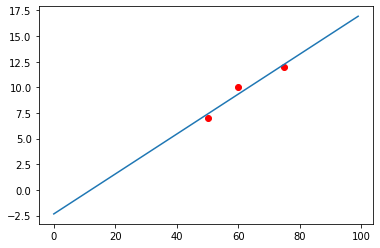

In [32]:
plt.figure()
plt.plot(V_pred[...,1], D_pred)
plt.scatter(V[...,1], D, color='r')
plt.show()

### Задача 6

In [33]:
import urllib
from urllib import request
import numpy as np

fname = input()  # read file name from stdin
f = request.urlopen(fname)  # open file from URL
data = np.loadtxt(f, delimiter=',', skiprows=1)  # load data to work with

https://stepic.org/media/attachments/lesson/16462/boston_houses.csv


In [34]:
data.shape

(506, 7)

In [35]:
Y = data[:,0].reshape(-1, 1)
print(Y.shape)

(506, 1)


In [36]:
X_0 = data[:,1:].reshape(Y.shape[0], -1)
ones = np.ones_like(Y)
X = np.hstack((ones, X_0))
print(X.shape)

(506, 7)


In [37]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
beta

array([[ -3.65580429],
       [ -0.2163955 ],
       [  0.0737306 ],
       [  4.41245058],
       [-25.46844878],
       [  7.14320155],
       [ -1.30108768]])

In [38]:
res = beta.flatten()
print(*res)

-3.6558042850642045 -0.2163955023691414 0.0737305981754855 4.41245057691283 -25.468448784098932 7.143201550746207 -1.3010876776489972
